<a href="https://colab.research.google.com/github/tj07-dev/notebooks/blob/main/Workout_Pose_2D_17Keypoints_Classification_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/tmp/datasetX-squat-rev.csv"; # change this
path_other = "/tmp/datasetX-other.csv"; # change this
name_class = "squat" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,305.326171,99.284166,311.477313,95.029238,308.882340,94.930555,322.441368,96.030014,318.434073,95.600313,...,318.655484,179.042677,321.873641,239.629819,317.454948,240.838745,328.763399,299.379523,322.553892,295.133221
1,307.862633,102.211906,310.808610,97.718169,309.369405,97.346600,322.540169,98.304947,320.326035,97.176355,...,318.855690,177.613139,323.146159,238.456764,317.356793,239.737744,328.949442,302.675909,322.055196,296.800207
2,307.021964,101.520982,311.474387,97.609717,309.797782,97.513883,323.644180,98.194328,320.237658,97.431400,...,318.779011,177.669479,322.878943,239.322864,318.198876,240.103689,329.061006,302.394245,323.263015,297.971772
3,306.442038,102.054308,310.750023,97.963264,309.183285,97.789595,322.554781,98.831208,319.804942,97.690400,...,318.938340,177.176504,322.737190,238.993900,318.708439,239.758874,328.563102,302.481385,322.608019,297.376547
4,306.819827,101.688490,310.997308,97.691148,309.595173,97.674247,322.513205,98.276187,320.050013,97.524863,...,319.232812,177.140008,322.392638,239.344105,318.322140,240.162063,328.997770,302.504881,323.487171,297.937783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,352.609803,37.248244,349.706396,30.933130,353.459813,31.224201,334.420633,30.246271,346.765935,31.869519,...,332.330403,155.849780,306.663650,231.166712,358.837580,234.106861,293.693484,304.787789,353.233832,313.335961
12627,354.820636,36.646037,351.125489,29.964425,355.702497,30.010588,335.083976,29.538270,348.186517,30.869875,...,333.069308,155.667631,305.966801,232.798524,358.905759,234.200603,294.048392,304.739686,353.073707,311.219086
12628,353.101342,36.601460,349.922040,30.465355,354.023728,30.788668,334.480602,29.717406,347.803901,31.281825,...,331.627649,155.867205,305.931589,231.134485,359.136562,234.199217,293.602951,305.190433,353.018846,313.693166
12629,354.186869,37.487486,350.931080,30.481504,355.974103,30.522585,335.314466,29.768397,349.472672,31.493261,...,332.771338,155.417789,305.585116,232.352046,358.987352,233.978619,294.928223,304.548444,353.444648,310.841686


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,378.162812,133.697748,382.611916,130.174581,376.661605,127.964534,389.016749,124.115379,366.646139,124.604502,...,314.927356,179.178430,356.988896,251.960273,321.809225,245.134542,339.068741,288.119522,301.582299,283.274199
1,377.810749,170.937018,381.918932,157.405005,372.638852,161.748918,376.078803,143.320401,358.117798,149.981018,...,284.043833,201.767984,366.816017,218.628263,313.957106,244.687839,365.398676,278.483067,330.414031,276.955767
2,377.619446,171.768986,381.601486,158.220659,371.756236,162.576243,374.796913,144.112416,356.963787,150.792401,...,282.569525,202.571783,368.015912,217.801610,312.830853,244.495105,366.845172,277.759470,331.876734,276.290567
3,365.337572,156.455117,371.944292,153.675019,363.397719,149.327594,378.593037,145.893353,351.453681,137.742272,...,304.982392,212.306597,345.402276,293.912188,280.292170,281.601748,338.693938,329.797204,284.966097,329.642319
4,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,301.002386,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355
12582,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,294.684201,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897
12583,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,290.868603,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815
12584,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,292.683972,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,305.326171,99.284166,311.477313,95.029238,308.882340,94.930555,322.441368,96.030014,318.434073,95.600313,...,179.042677,321.873641,239.629819,317.454948,240.838745,328.763399,299.379523,322.553892,295.133221,squat
1,307.862633,102.211906,310.808610,97.718169,309.369405,97.346600,322.540169,98.304947,320.326035,97.176355,...,177.613139,323.146159,238.456764,317.356793,239.737744,328.949442,302.675909,322.055196,296.800207,squat
2,307.021964,101.520982,311.474387,97.609717,309.797782,97.513883,323.644180,98.194328,320.237658,97.431400,...,177.669479,322.878943,239.322864,318.198876,240.103689,329.061006,302.394245,323.263015,297.971772,squat
3,306.442038,102.054308,310.750023,97.963264,309.183285,97.789595,322.554781,98.831208,319.804942,97.690400,...,177.176504,322.737190,238.993900,318.708439,239.758874,328.563102,302.481385,322.608019,297.376547,squat
4,306.819827,101.688490,310.997308,97.691148,309.595173,97.674247,322.513205,98.276187,320.050013,97.524863,...,177.140008,322.392638,239.344105,318.322140,240.162063,328.997770,302.504881,323.487171,297.937783,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,352.609803,37.248244,349.706396,30.933130,353.459813,31.224201,334.420633,30.246271,346.765935,31.869519,...,155.849780,306.663650,231.166712,358.837580,234.106861,293.693484,304.787789,353.233832,313.335961,squat
12627,354.820636,36.646037,351.125489,29.964425,355.702497,30.010588,335.083976,29.538270,348.186517,30.869875,...,155.667631,305.966801,232.798524,358.905759,234.200603,294.048392,304.739686,353.073707,311.219086,squat
12628,353.101342,36.601460,349.922040,30.465355,354.023728,30.788668,334.480602,29.717406,347.803901,31.281825,...,155.867205,305.931589,231.134485,359.136562,234.199217,293.602951,305.190433,353.018846,313.693166,squat
12629,354.186869,37.487486,350.931080,30.481504,355.974103,30.522585,335.314466,29.768397,349.472672,31.493261,...,155.417789,305.585116,232.352046,358.987352,233.978619,294.928223,304.548444,353.444648,310.841686,squat


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,378.162812,133.697748,382.611916,130.174581,376.661605,127.964534,389.016749,124.115379,366.646139,124.604502,...,179.178430,356.988896,251.960273,321.809225,245.134542,339.068741,288.119522,301.582299,283.274199,other
1,377.810749,170.937018,381.918932,157.405005,372.638852,161.748918,376.078803,143.320401,358.117798,149.981018,...,201.767984,366.816017,218.628263,313.957106,244.687839,365.398676,278.483067,330.414031,276.955767,other
2,377.619446,171.768986,381.601486,158.220659,371.756236,162.576243,374.796913,144.112416,356.963787,150.792401,...,202.571783,368.015912,217.801610,312.830853,244.495105,366.845172,277.759470,331.876734,276.290567,other
3,365.337572,156.455117,371.944292,153.675019,363.397719,149.327594,378.593037,145.893353,351.453681,137.742272,...,212.306597,345.402276,293.912188,280.292170,281.601748,338.693938,329.797204,284.966097,329.642319,other
4,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355,other
12582,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897,other
12583,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815,other
12584,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,305.326171,99.284166,311.477313,95.029238,308.882340,94.930555,322.441368,96.030014,318.434073,95.600313,...,179.042677,321.873641,239.629819,317.454948,240.838745,328.763399,299.379523,322.553892,295.133221,squat
1,307.862633,102.211906,310.808610,97.718169,309.369405,97.346600,322.540169,98.304947,320.326035,97.176355,...,177.613139,323.146159,238.456764,317.356793,239.737744,328.949442,302.675909,322.055196,296.800207,squat
2,307.021964,101.520982,311.474387,97.609717,309.797782,97.513883,323.644180,98.194328,320.237658,97.431400,...,177.669479,322.878943,239.322864,318.198876,240.103689,329.061006,302.394245,323.263015,297.971772,squat
3,306.442038,102.054308,310.750023,97.963264,309.183285,97.789595,322.554781,98.831208,319.804942,97.690400,...,177.176504,322.737190,238.993900,318.708439,239.758874,328.563102,302.481385,322.608019,297.376547,squat
4,306.819827,101.688490,310.997308,97.691148,309.595173,97.674247,322.513205,98.276187,320.050013,97.524863,...,177.140008,322.392638,239.344105,318.322140,240.162063,328.997770,302.504881,323.487171,297.937783,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25212,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355,other
25213,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897,other
25214,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815,other
25215,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,305.326171,99.284166,311.477313,95.029238,308.882340,94.930555,322.441368,96.030014,318.434073,95.600313,...,318.655484,179.042677,321.873641,239.629819,317.454948,240.838745,328.763399,299.379523,322.553892,295.133221
1,307.862633,102.211906,310.808610,97.718169,309.369405,97.346600,322.540169,98.304947,320.326035,97.176355,...,318.855690,177.613139,323.146159,238.456764,317.356793,239.737744,328.949442,302.675909,322.055196,296.800207
2,307.021964,101.520982,311.474387,97.609717,309.797782,97.513883,323.644180,98.194328,320.237658,97.431400,...,318.779011,177.669479,322.878943,239.322864,318.198876,240.103689,329.061006,302.394245,323.263015,297.971772
3,306.442038,102.054308,310.750023,97.963264,309.183285,97.789595,322.554781,98.831208,319.804942,97.690400,...,318.938340,177.176504,322.737190,238.993900,318.708439,239.758874,328.563102,302.481385,322.608019,297.376547
4,306.819827,101.688490,310.997308,97.691148,309.595173,97.674247,322.513205,98.276187,320.050013,97.524863,...,319.232812,177.140008,322.392638,239.344105,318.322140,240.162063,328.997770,302.504881,323.487171,297.937783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25212,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,301.002386,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355
25213,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,294.684201,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897
25214,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,290.868603,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815
25215,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,292.683972,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166


In [ ]:
y

0        squat
1        squat
2        squat
3        squat
4        squat
         ...  
25212    other
25213    other
25214    other
25215    other
25216    other
Name: class, Length: 25217, dtype: object

In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.477072,0.275789,0.486683,0.263970,0.482629,0.263696,0.503815,0.266750,0.497553,0.265556,...,0.497899,0.497341,0.502928,0.665638,0.496023,0.668997,0.513693,0.831610,0.503990,0.819815
1,0.481035,0.283922,0.485638,0.271439,0.483390,0.270407,0.503969,0.273069,0.500509,0.269934,...,0.498212,0.493370,0.504916,0.662380,0.495870,0.665938,0.513984,0.840766,0.503211,0.824445
2,0.479722,0.282003,0.486679,0.271138,0.484059,0.270872,0.505694,0.272762,0.500371,0.270643,...,0.498092,0.493526,0.504498,0.664786,0.497186,0.666955,0.514158,0.839984,0.505098,0.827699
3,0.478816,0.283484,0.485547,0.272120,0.483099,0.271638,0.503992,0.274531,0.499695,0.271362,...,0.498341,0.492157,0.504277,0.663872,0.497982,0.665997,0.513380,0.840226,0.504075,0.826046
4,0.479406,0.282468,0.485933,0.271364,0.483742,0.271317,0.503927,0.272989,0.500078,0.270902,...,0.498801,0.492056,0.503738,0.664845,0.497378,0.667117,0.514059,0.840291,0.505449,0.827605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25212,0.263102,0.592534,0.254599,0.578735,0.258090,0.605175,0.256563,0.542537,0.268473,0.609909,...,0.470316,0.547570,0.534819,0.289788,0.594748,0.566321,0.609568,0.162710,0.700505,0.530287
25213,0.296891,0.557990,0.261343,0.572002,0.271818,0.588838,0.260690,0.532748,0.272988,0.599159,...,0.460444,0.567474,0.559271,0.387046,0.583962,0.569507,0.617232,0.155209,0.697560,0.536961
25214,0.283270,0.529132,0.260809,0.534795,0.268222,0.553452,0.260141,0.512053,0.268461,0.576875,...,0.454482,0.554917,0.540177,0.303817,0.583440,0.547704,0.615435,0.152498,0.680966,0.536616
25215,0.280752,0.530683,0.264657,0.481524,0.266393,0.533187,0.263721,0.522440,0.259036,0.558495,...,0.457319,0.529871,0.533321,0.294661,0.453635,0.635630,0.616708,0.153398,0.624183,0.152681


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 22695
The number of test data X is: 2522
The number of train data y is : 22695
The number of test daya y is : 2522
The total dataset is : 25217


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
355/355 [==============================] - 2s 4ms/step - loss: 0.6202 - accuracy: 0.6464 - val_loss: 0.4521 - val_accuracy: 0.7867
Epoch 2/200
355/355 [==============================] - 1s 3ms/step - loss: 0.4208 - accuracy: 0.8233 - val_loss: 0.3217 - val_accuracy: 0.8612
Epoch 3/200
355/355 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8699 - val_loss: 0.2483 - val_accuracy: 0.9009
Epoch 4/200
355/355 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.8924 - val_loss: 0.1727 - val_accuracy: 0.9409
Epoch 5/200
355/355 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9102 - val_loss: 0.1507 - val_accuracy: 0.9421
Epoch 6/200
355/355 [==============================] - 1s 3ms/step - loss: 0.2419 - accuracy: 0.9130 - val_loss: 0.1357 - val_accuracy: 0.9584
Epoch 7/200
355/355 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9241 - val_loss: 0.1109 - val_accuracy: 0.9691

## Visualization Acc & Loss

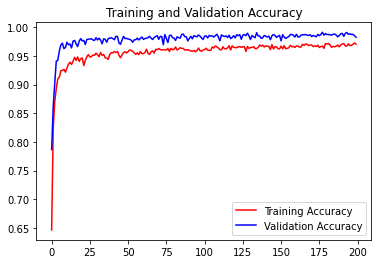

<Figure size 432x288 with 0 Axes>

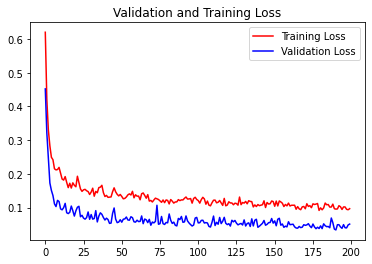

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.05089341104030609
Test accuracy: 0.9825535416603088


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
9483,0.426664,0.29973,0.431394,0.289039,0.429971,0.291361,0.452341,0.301222,0.449918,0.30295,...,0.546855,0.53653,0.448782,0.655728,0.454075,0.641619,0.48917,0.814569,0.497522,0.788791


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : squat


In [ ]:
df_data['class'].unique()

array(['squat', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 20ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
squat


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-02-02 14:59:52.381954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-02 14:59:52.382140: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-02 14:59:52.382162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 79%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)


Don't forget to download tfjs model (check relatable folder)